# Logistic Regression of Diabetics

In [1]:
## Importing libreries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Ther is no Null values, and has all numeric data types

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see there is few columns Glucose, Insulin, Skin Thickness, BMI and BloodPressure which have value 0. which is not possible right? We can deal with them by removing those data or replace their values with mean values. 

In [5]:
## There is some features that can not be 0, so let's replce those cells with mean values.

df["BMI"] = df["BMI"].replace(0, df["BMI"].mean())
df["Glucose"] = df["Glucose"].replace(0, df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0, df["BloodPressure"].mean())
df["Insulin"] = df["Insulin"].replace(0, df["Insulin"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

<AxesSubplot:>

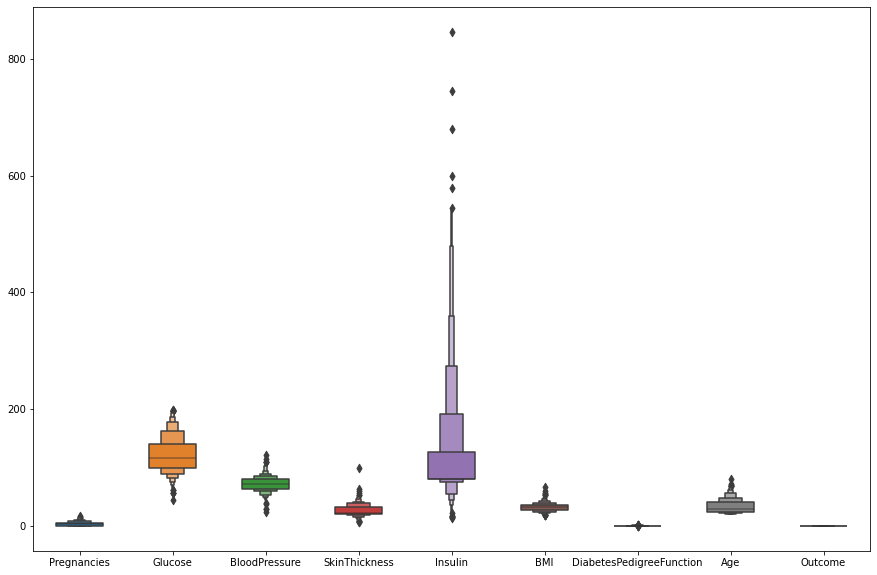

In [6]:
## Let's see if there is some outliers present or not

fig, ax = plt.subplots(figsize = (15, 10))
sns.boxenplot(data = df, width = 0.5, ax = ax)

we can see that my Insulin data have lots of outliers

In [7]:
## splitting dependent and independent columns

x = df.drop(columns= ["Outcome"])
y = df["Outcome"]

In [8]:
## splitting the data to train and test the model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 , random_state=0)

In [25]:
import pickle
from sklearn.preprocessing import StandardScaler

def scaler_standard(x_train, x_test):
    # Scaling the data
    sts = StandardScaler()
    x_train_scale = sts.fit_transform(x_train)
    x_test_scale = sts.transform(x_test)

    # saving the model
    file = open("C:/Users/mohan/Downloads\Data_Science/ML_Regression/Logistic Regression/6/Model/StandardScaler.pkl", "wb")
    pickle.dump(sts, file)
    file.close()

    return x_train_scale, x_test_scale

In [26]:
x_train_scaled, x_test_scaled = scaler_standard(x_train, x_test)

In [27]:
x_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [29]:
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

## HyperParameter Tuning

### GridSearch CV

In [30]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [31]:
## Parameter Grid
parameter = {
    "penalty": ["l1", "l2"],
    "C": np.logspace(-3, 3, 7),
    "solver": ["newton-cg", "lbfgs", "liblinear"]
}

In [32]:
logreg = LogisticRegression()
clf = GridSearchCV(log_reg,                 # model
                   param_grid=parameter,    # Hyper parameters
                   scoring="accuracy",      # metrics of scoring
                   cv=10)                   # Number of Folds

In [33]:
clf.fit(x_train_scaled, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [34]:
clf.best_score_

0.763793103448276

In [35]:
clf.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}

Let's see how well our model performe on the test dataset

In [36]:
y_pred = clf.predict(x_test_scaled)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]], dtype=int64)

In [38]:
tp = conf_mat[0][0]
fp = conf_mat[0][1]
fn = conf_mat[1][0]
tn = conf_mat[1][1]

In [39]:
Accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (recall * precision) / (recall + precision)

print(Accuracy)
print(precision)
print(recall)
print(f1_score)

0.796875
0.9
0.8181818181818182
0.8571428571428572


In [40]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.796875
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       130
           1       0.73      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192



In [42]:
file = open("C:/Users/mohan/Downloads/Data_Science/ML_Regression/Logistic Regression/6/Model/ModelForPrediction.pkl", "wb")
pickle.dump(log_reg, file)
file.close()